#  This is the shared code to work on the Yelp review recommemndation project
1. File owner: Koki 
2. Shared with: Phil, Andrew, Adharsh

#  To intall 3rd party libraries

```python
!pip install <library_name>
```

# Guidelines

Everyone needs to run this code on their own machine once to work on the code to connect their google drive to the shard code. 
Basically, everyone has their own running kernal. The variables defined in my kernal are therefore, not available in yours. 
To make it possible for others to continue building the pipeline, be sure to save your output into a file (json, csv, etc) whenever possible.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import networkx as nx

In [ ]:
# Mount to your own google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Check files
# 1. To access files, you need to copy the folder onto your own gdrive. 
# 2. Each of you need to mount your own gdrive. 
# 3. The path should match the one below exactly or the code will not run for everyone else.
import os
os.listdir('gdrive/My Drive/SI_608_Group_Project/yelp_dataset')

['Yelp_Dataset_Challenge_Round_12.pdf',
 'Dataset_Challenge_Dataset_Agreement.pdf',
 'yelp_academic_dataset_business.json',
 'yelp_academic_dataset_checkin.json',
 'yelp_academic_dataset_photo.json',
 'yelp_academic_dataset_review.json',
 'yelp_academic_dataset_tip.json',
 'yelp_academic_dataset_user.json',
 'resturant_ID.csv',
 'resturant_ID.gsheet',
 'Phil Bitch Notebook.ipynb',
 'restaurant_ID_v2.csv',
 'reviews.csv',
 'bipartite.ipynb',
 'reviews_bipartite.net',
 'SI650_FinalProject',
 'restaurant_ID_v3.csv',
 'Phil_bitch_group_category.ipynb',
 'user_category_tuples.csv',
 'user_category_bipartite.net',
 'reviews_filtered.csv',
 'test.csv',
 'train.csv',
 'equal_distribution_test.csv',
 'equal_distribution_train.csv',
 'Design Challenge II.gdoc']

# Koki's Code Section

In [ ]:
# Load Files
yelp_buisness = pd.read_json('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/yelp_academic_dataset_business.json', lines=True)

In [ ]:
yelp_buisness.head(5)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB


In [ ]:
# print number of rows or buisnesses
yelp_buisness.shape[0]

188593

In [ ]:
# All columns
buisness_cols = list(yelp_buisness.columns)

print("The yelp buisness dataset contains the following columns:")
buisness_cols

The yelp buisness dataset contains the following columns:


['address',
 'attributes',
 'business_id',
 'categories',
 'city',
 'hours',
 'is_open',
 'latitude',
 'longitude',
 'name',
 'neighborhood',
 'postal_code',
 'review_count',
 'stars',
 'state']

In [ ]:
# Detailed memory usage information about buisness dataframe
yelp_buisness.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 224.1 MB


In [ ]:
# Filter out non-relevant columns
yelp_buisness = yelp_buisness.drop(['address', 'hours', 'latitude', 'longitude', 'neighborhood', 'postal_code'], axis=1)

In [ ]:
yelp_buisness.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188593 entries, 0 to 188592
Data columns (total 9 columns):
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
is_open         188593 non-null int64
name            188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 138.4 MB


In [ ]:
# What establishments are open? closed? 
yelp_buisness['is_open'].value_counts()

1    156606
0     31987
Name: is_open, dtype: int64

In [ ]:
# Filter out establishments that are not open
yelp_buisness = yelp_buisness[yelp_buisness['is_open'] == 1]

# Check that closed establishments are removed 
yelp_buisness['is_open'].unique()

array([1])

In [ ]:
# How many states are there? 
print('There are a total of {} states'.format(len(yelp_buisness['state'].unique())))
yelp_buisness['state'].unique()

There are a total of 67 states


array(['AB', 'AZ', 'ON', 'PA', 'QC', 'NV', 'OH', 'WI', 'NC', 'NYK', 'IL',
       'SC', 'C', 'BY', 'XGM', 'ST', 'IN', 'RP', 'CMA', 'NI', 'NLK', 'VS',
       '6', 'CO', 'HE', 'VA', 'RCC', '01', 'SG', 'NY', 'OR', 'NW', '4',
       '10', 'CC', 'CA', '45', 'LU', 'G', 'PO', 'B', 'VT', 'AL', 'WAR',
       'MO', 'HU', 'M', 'AR', 'O', 'FL', 'WA', 'KY', 'CRF', 'TAM', 'NE',
       'XMS', 'GA', 'AG', 'WHT', 'MA', 'BC', 'SP', 'DE', 'HH', '11', 'CS',
       'MN'], dtype=object)

## Some of these are non-valid state codes. Not quite sure what the meaning is for these unknown labels. For now, keep them with the data until we find some documentation explaining them

In [ ]:
yelp_buisness['state'].value_counts()

AZ     47168
NV     29232
ON     26031
NC     12196
OH     11742
PA      9296
QC      7290
AB      6486
WI      4168
IL      1574
SC       651
NYK      156
NI       118
IN        81
OR        57
BY        52
ST        42
CO        42
C         32
HE        31
XGM       22
NLK       22
NY        19
RP        18
01        11
VS         7
CA         7
6          3
NW         3
O          3
       ...  
AL         2
MO         2
WA         1
CC         1
AG         1
NE         1
WHT        1
MN         1
HU         1
LU         1
45         1
VA         1
RCC        1
GA         1
CS         1
FL         1
WAR        1
BC         1
TAM        1
PO         1
MA         1
4          1
KY         1
CRF        1
10         1
11         1
DE         1
HH         1
SP         1
XMS        1
Name: state, Length: 67, dtype: int64

## It seems the data is mostly gathered from Arizona. Odd, since considering that cities such as Los Angels has many resturants and establishments, yet it is not included within this dataset

## Run the code below if you want to remove all non-valid state codes

In [ ]:
# Taken from https://gist.github.com/JeffPaine/3083347
valid_state_codes = [
          "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
          ]

In [ ]:
# Drop non state codes
yelp_buisness = yelp_buisness[yelp_buisness['state'].isin(valid_state_codes)]

# Check 
yelp_buisness['state'].unique()

array(['AZ', 'PA', 'NV', 'OH', 'WI', 'NC', 'IL', 'SC', 'IN', 'CO', 'VA',
       'NY', 'OR', 'CA', 'VT', 'AL', 'MO', 'AR', 'FL', 'WA', 'KY', 'NE',
       'GA', 'MA', 'DE', 'MN'], dtype=object)

## Find all buisnesses that either have 'Food' or 'Resturants' label in their categories

In [ ]:
# Show all categories 
yelp_buisness.groupby('categories')['categories'].count()[:10]

categories
ATV Rentals/Tours, Active Life                                                                                                                                            3
ATV Rentals/Tours, Active Life, Boating, RV Rental, Hotels & Travel                                                                                                       1
ATV Rentals/Tours, Active Life, Event Planning & Services, Automotive, Trailer Repair, Local Services, Auto Customization, Golf Cart Rentals, Tires, Metal Fabricators    1
ATV Rentals/Tours, Active Life, Event Planning & Services, Boat Charters, Boating, Hotels & Travel, Tours                                                                 1
ATV Rentals/Tours, Automotive, Motorcycle Dealers, Auto Repair, RV Dealers, Active Life, Motorcycle Repair                                                                1
ATV Rentals/Tours, Boat Tours, Tours, Active Life, Hotels & Travel, Scavenger Hunts                                              

In [ ]:
import re

In [ ]:
# Convert category entries from string to set and keep only unique values

# Initialize empty set
unique_terms = set()

# Regex to capture all category labels
p = re.compile('\,\s')

counter = 0 
# Iterate through every row of categories
for x in yelp_buisness['categories']: 
  if x:
    # Convert all words to lowercase 
    unique_terms.update(p.split(x))

# Check
print("Total number of unique labels: {}".format(len(unique_terms)))
print(unique_terms)

Total number of unique labels: 1255
{'Cabinetry', 'Ceremonial Clothing', 'Aircraft Dealers', 'Medical Spas', 'Restaurants', 'Window Washing', 'Train Stations', 'Honey', 'Digitizing Services', 'Orthopedists', 'Furniture Reupholstery', 'Propane', 'Art Supplies', 'Party Characters', 'Adult Education', 'Aerial Tours', 'Taxidermy', 'Screen Printing', 'Chiropractors', 'Hospice', 'Skate Shops', 'Framing', 'Internal Medicine', 'Cooking Schools', 'Pumpkin Patches', 'Proctologists', 'Police Departments', 'Hair Stylists', 'Rehabilitation Center', 'Estate Planning Law', 'Pet Transportation', 'Furniture Repair', 'Bartenders', 'Mongolian', 'Career Counseling', 'Chinese', 'Club Crawl', 'Astrologers', 'Food Court', 'Surfing', 'Product Design', 'Prosthodontists', 'Boudoir Photography', 'Packing Services', 'Barbeque', 'Surgeons', 'Hair Loss Centers', 'Glass & Mirrors', 'Ski Resorts', 'Emergency Rooms', 'Cheerleading', 'Uzbek', 'Drugstores', 'Security Systems', 'Fur Clothing', 'Veterans Organizations', '

In [ ]:
# Find all resturants
# 1. food - 1920 matches
# 2. Food - 27015 matches
# 3. Food|food - 28443 matches
# 4. Restaurants - 41342 matches
# 5. restaurants - 0 matches 
# 6. Food|Restaurants|food - 53793 matches 
# 7. Food|Restaurants - 53793 matches (same number so omit food)

# Some mistakes captured such as: 
# Health & Medical, Active Life, Vitamins & Supplements, Nutritionists, Food, Trainers, Specialty Food, Fitness & Instruction, Health Markets, Shopping

restaurant_reviews = yelp_buisness[yelp_buisness['categories'].str.contains('Food|Restaurants')==True]

# Check
print("Number of relevant reviews: {}".format(len(restaurant_reviews)))

# View 
restaurant_reviews.head(10)

# TESTING
# counts = 0
# for x in restaurant_reviews['categories']:
#   if 'Health & Medical' in x:
#     counts += 1 
#     print(x)

# print(counts)

Number of relevant reviews: 32164


,attributes,business_id,categories,city,is_open,name,review_count,stars,state
5,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",Phoenix,1,The Coffee Bean & Tea Leaf,63,4.0,AZ
8,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,1,Filiberto's Mexican Food,40,2.5,AZ
12,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,1,Original Hamburger Works,277,4.0,AZ
21,None,gJ5xSt6147gkcZ9Es0WxlA,"Fast Food, Burgers, Restaurants",Cleveland,1,Rally's Hamburgers,5,3.0,OH
22,"{'Ambience': '{'romantic': False, 'intimate': ...",3ByGQOVgds2YEu6kzl-XEQ,"Nightlife, Bars, American (Traditional), Sport...",Phoenix,1,Rib Shop,3,2.5,AZ
24,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",CeuTRtwsq6w5rztGOyNMPg,"Mexican, Restaurants",Phoenix,1,Salsitas,14,2.5,AZ
29,"{'BusinessAcceptsCreditCards': 'True', 'Busine...",6YC6CsXRrmPv_iwfvc9onA,"Pizza, Restaurants",Streetsboro,1,Teresas Pizzeria,11,3.0,OH
30,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",42uRhhQDzbtKrUYoBPXS8A,"Nightlife, Restaurants, Bars, Chicken Wings, A...",Sun Prairie,1,Chicken Lips,102,4.5,WI
32,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",kgffcoxT6BQp-gJ-UQ7Czw,"Fast Food, Restaurants, Sandwiches",Las Vegas,1,Subway,13,2.5,NV
33,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",0jtRI7hVMpQHpUVtUy4ITw,"Beer, Wine & Spirits, Italian, Food, American ...",Las Vegas,1,Omelet House Summerlin,242,4.0,NV


In [ ]:
# Find all restaurants
# 1. food - 1920 matches
# 2. Food - 27015 matches
# 3. Food|food - 28443 matches
# 4. Restaurants - 41342 matches
# 5. restaurants - 0 matches 
# 6. Food|Restaurants|food - 53793 matches 
# 7. Food|Restaurants - 53793 matches (same number so omit food)

# Some mistakes captured such as: 
# Health & Medical, Active Life, Vitamins & Supplements, Nutritionists, Food, Trainers, Specialty Food, Fitness & Instruction, Health Markets, Shopping
# Food is contained here, but it is a drug store and not an pure restaurant or food place 
restaurant_buisnesses = yelp_buisness[yelp_buisness['categories'].str.contains('Restaurants')==True]

# Check
print("Number of relevant buisnesses: {}".format(len(restaurant_buisnesses)))

# View 
restaurant_buisnesses.head(10)

Number of relevant buisnesses: 24137


,attributes,business_id,categories,city,is_open,name,review_count,stars,state
8,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,1,Filiberto's Mexican Food,40,2.5,AZ
12,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,1,Original Hamburger Works,277,4.0,AZ
21,None,gJ5xSt6147gkcZ9Es0WxlA,"Fast Food, Burgers, Restaurants",Cleveland,1,Rally's Hamburgers,5,3.0,OH
22,"{'Ambience': '{'romantic': False, 'intimate': ...",3ByGQOVgds2YEu6kzl-XEQ,"Nightlife, Bars, American (Traditional), Sport...",Phoenix,1,Rib Shop,3,2.5,AZ
24,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",CeuTRtwsq6w5rztGOyNMPg,"Mexican, Restaurants",Phoenix,1,Salsitas,14,2.5,AZ
29,"{'BusinessAcceptsCreditCards': 'True', 'Busine...",6YC6CsXRrmPv_iwfvc9onA,"Pizza, Restaurants",Streetsboro,1,Teresas Pizzeria,11,3.0,OH
30,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",42uRhhQDzbtKrUYoBPXS8A,"Nightlife, Restaurants, Bars, Chicken Wings, A...",Sun Prairie,1,Chicken Lips,102,4.5,WI
32,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",kgffcoxT6BQp-gJ-UQ7Czw,"Fast Food, Restaurants, Sandwiches",Las Vegas,1,Subway,13,2.5,NV
33,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",0jtRI7hVMpQHpUVtUy4ITw,"Beer, Wine & Spirits, Italian, Food, American ...",Las Vegas,1,Omelet House Summerlin,242,4.0,NV
35,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",UeyHx5LMFjjI4d-NTYkX9Q,"Restaurants, Cafes",Middlefield,1,Crossroads Country Cafe',3,2.5,OH


In [ ]:
# Initialize empty set
unique_terms = set()

# Regex to capture all category labels
p = re.compile('\,\s')

counter = 0 
# Iterate through every row of categories
for x in restaurant_buisnesses['categories']: 
    if x:
        # Convert all words to lowercase 
        unique_terms.update(p.split(x))

# Check
print("Total number of unique labels: {}".format(len(unique_terms)))
print(unique_terms)

Total number of unique labels: 612
{'Medical Spas', 'Restaurants', 'Honey', 'Furniture Reupholstery', 'Adult Education', 'Screen Printing', 'Cooking Schools', 'Pumpkin Patches', 'Rehabilitation Center', 'Hair Stylists', 'Estate Planning Law', 'Mongolian', 'Furniture Repair', 'Bartenders', 'Chinese', 'Club Crawl', 'Food Court', 'Barbeque', 'Uzbek', 'Glass & Mirrors', 'Ski Resorts', 'Drugstores', 'Security Systems', 'Fur Clothing', 'Transportation', 'Scandinavian', 'Printing Services', 'Hungarian', 'Juice Bars & Smoothies', 'Lebanese', 'Baby Gear & Furniture', 'Vegan', 'Handyman', 'Street Vendors', 'Bagels', 'Butcher', 'Swimming Pools', 'Patisserie/Cake Shop', 'Session Photography', 'Fish & Chips', 'Gyms', 'Banks & Credit Unions', 'Arts & Entertainment', 'Art Galleries', 'Persian/Iranian', 'Seafood', 'Florists', 'Marinas', 'Dry Cleaning & Laundry', 'Convenience Stores', 'Pakistani', 'Beaches', 'Post Offices', 'Hawaiian', 'Electronics', 'Bakeries', 'Italian', 'Do-It-Yourself Food', 'Tobac

In [ ]:
# Manually filter out irrelevant tags 
# For example, the following buisness contains the word 'Food' in their category
# However, it is a nutrition store and not a place people usually go to for food or drinks, 
restaurant_buisnesses[restaurant_buisnesses['categories'].str.contains('Property Management')==True][['categories', 'name']]

,categories,name
79645,"Real Estate, Hot Dogs, Property Management, Re...",MXP Real Estate Investment
138665,"Real Estate, Real Estate Services, Real Estate...",Canam Realty Group


In [ ]:
restaurant_buisnesses.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24137 entries, 8 to 188577
Data columns (total 9 columns):
attributes      23733 non-null object
business_id     24137 non-null object
categories      24137 non-null object
city            24137 non-null object
is_open         24137 non-null int64
name            24137 non-null object
review_count    24137 non-null int64
stars           24137 non-null float64
state           24137 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 25.6 MB


In [ ]:
resturant_ID = restaurant_buisnesses['business_id']

In [ ]:
resturant_ID.to_csv('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/restaurant_ID_v3.csv', index=False)

In [3]:
restaurant_reviews['categories'].head(10)

# Adharsh Code Section

In [4]:
##Loading in the reviews_dataset
data=[]
review_data=pd.read_json('gdrive/My Drive/yelp_dataset/yelp_academic_dataset_review.json',lines=True,chunksize=100000)



In [ ]:
review_data

In [ ]:
for i in review_data:
  data.append(i[['user_id','stars','business_id']])
  


In [ ]:
review_dataset=pd.concat(data)

In [ ]:
#Loading in the business id of the restaurant
restaurantid=pd.read_csv('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/restaurant_ID_v2.csv',header=None)


In [ ]:
restaurantid.columns

Int64Index([0], dtype='int64')

In [ ]:
# restaurantid['Apn5Q_b6Nz61Tq4XzPdf9A'].head(5)

In [ ]:
review_dataset=review_dataset[review_dataset['business_id'].isin(restaurantid[0])]

In [ ]:
review_dataset.to_csv('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/reviews.csv')

In [ ]:
review_dataset.shape

(2766358, 3)

In [ ]:
len((review_dataset['business_id'].unique()))

32164

In [ ]:
#Just interesting facts is that there are people who give more reviews than excepted.
plot_data = review_dataset.groupby('business_id')['business_id'].count().sort_values(ascending=False)

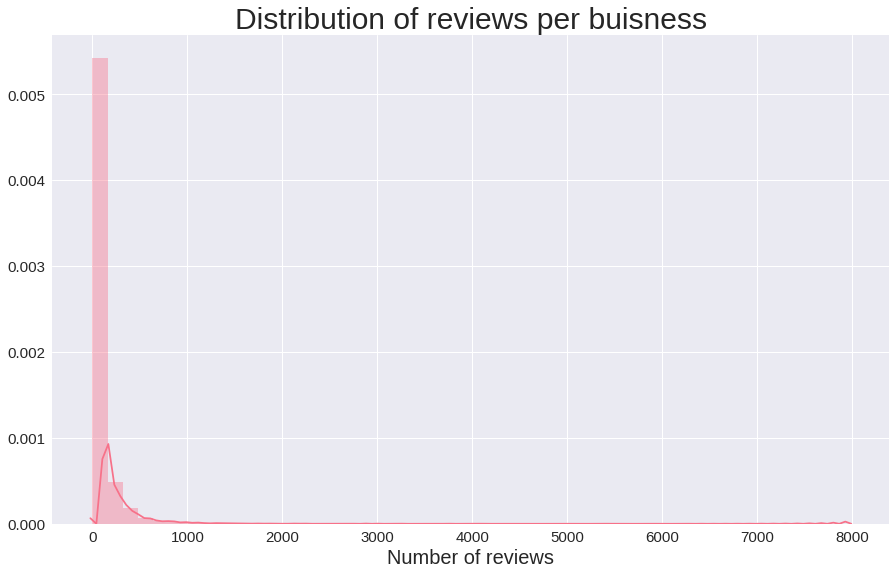

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Set the style of seaborn plot
sns.set(style='darkgrid', palette='husl', font_scale=1.5)

# Create matplotlib Figure and Axes object
f, ax = plt.subplots(figsize=(15,9))

# Create the plot
g = sns.distplot(plot_data)

# Fine Tuning font size
g.set_xlabel('Number of reviews', fontsize=20)
# g.set_ylabel('Number of Nodes', fontsize=20)
g.axes.set_title('Distribution of reviews per buisness', fontsize=30)

# Display
plt.show(g)


In [ ]:
buisnesses_greater_than_10 = [x for x in plot_data if x >= 5]
buisnesses_greater_than_10[:5]

[7968, 7861, 6447, 5382, 4981]

In [ ]:
# Number of valid businesses
len(buisnesses_greater_than_10)

28731

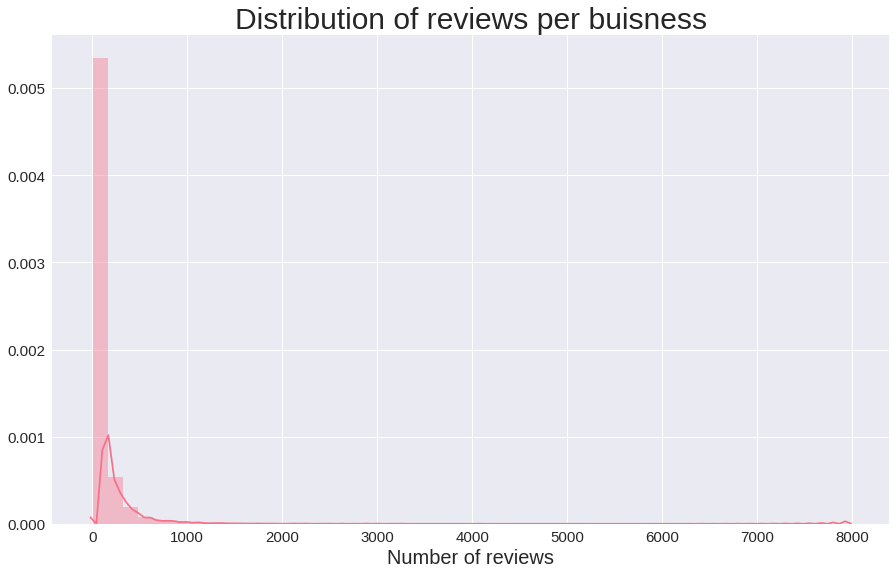

In [ ]:
# Set the style of seaborn plot
sns.set(style='darkgrid', palette='husl', font_scale=1.5)

# Create matplotlib Figure and Axes object
f, ax = plt.subplots(figsize=(15,9))

# Create the plot
g = sns.distplot(buisnesses_greater_than_10)

# Fine Tuning font size
g.set_xlabel('Number of reviews', fontsize=20)
# g.set_ylabel('Number of Nodes', fontsize=20)
g.axes.set_title('Distribution of reviews per buisness', fontsize=30)

# Display
plt.show(g)

In [ ]:
#Just looking at the number of stars given by the user
review_dataset[review_dataset['user_id']=='CxDOIDnH8gp9KXzpBHJYXw']
#Exploring this user and finding if it is possible to understand their cusine interest would be a great starting point.
#It would be ideal to throw people who has given only review as it would weaken our algorithm.

,user_id,stars,business_id
5385644,CxDOIDnH8gp9KXzpBHJYXw,3,txAKid34IUd9spo6MLF_Sw
5385645,CxDOIDnH8gp9KXzpBHJYXw,3,CfxVkwEJk1NAqgqMSesLzA
5385647,CxDOIDnH8gp9KXzpBHJYXw,3,OBG1j517k7aZRNC1HAL0TA
5385648,CxDOIDnH8gp9KXzpBHJYXw,3,-M9S1wlZTvv6T9EOo5X2Yw
5385649,CxDOIDnH8gp9KXzpBHJYXw,4,LnsAgGlvIPmc9eV_cMdU5w
5385651,CxDOIDnH8gp9KXzpBHJYXw,3,RC_Eshxv0mK68g5bc80kGA
5385653,CxDOIDnH8gp9KXzpBHJYXw,4,G1Ce_QBHwT_R8Fc2-ARrwQ
5385655,CxDOIDnH8gp9KXzpBHJYXw,4,39nPYUxkRn8SQY29C322UQ
5385656,CxDOIDnH8gp9KXzpBHJYXw,4,9oyYmCv9HuVRa1lZUE86sw
5385657,CxDOIDnH8gp9KXzpBHJYXw,2,oTaU3tZxtKzCwrPcx6SpoQ


In [ ]:
#In all there are 17 million reviews in the dataset
count=0
for i in review_data:
  count=count+1
print(count)

176


In [6]:
#Loading the json reader together into a data list
for i in range(0,10):
  data.append(review_data[i])
Concatenating the chunks together to load the entire dataset
review_dataset=pd.DataFrame(data)

# Andrews Code Section

In [ ]:
import pandas as pd
import os
import numpy as np
import json
import networkx as nx

In [ ]:
os.listdir('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/')

['Yelp_Dataset_Challenge_Round_12.pdf',
 'Dataset_Challenge_Dataset_Agreement.pdf',
 'yelp_academic_dataset_business.json',
 'yelp_academic_dataset_checkin.json',
 'yelp_academic_dataset_photo.json',
 'yelp_academic_dataset_review.json',
 'yelp_academic_dataset_tip.json',
 'yelp_academic_dataset_user.json',
 'resturant_ID.csv']

In [ ]:
##Loading in the user_dataset
data=[]
yelp_user=pd.read_json('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/yelp_academic_dataset_user.json',lines=True,chunksize=100000)

#Loading the json reader together into a data list
for i in yelp_user:
  data.append(i)
#Concatenating the chunks together to load the entire dataset
yelp_user=pd.concat(data)

In [ ]:
yelp_user.sample(5)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
137080,3.54,0,0,0,0,0,0,1,0,1,...,0,None,0,None,0,Marcia,21,0,pRF76Vzvj_QmS9uow_E1rQ,2012-09-30
1379252,1.00,0,0,0,0,0,0,0,0,0,...,0,None,0,"SEL9F2jU7E2Y1kGnmR51AQ, SqwmWZ7sVO3gB-O3gZqpmg...",0,Tyler,1,0,_NjGo_3oHVMwgwv7yueeIQ,2016-03-03
1411107,1.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Lys,1,0,3s0iCgf99dfg7JR8_Llpcg,2018-04-06
57666,3.88,0,0,0,0,0,0,0,0,2,...,0,None,0,"e9eqBdpZaTJcO16JuEFkTg, nGCoZDCgM82E0mZJCQgcaw...",0,Joe,26,2,cyOWHQtZr1vsxep7_rdW1Q,2011-06-22
287208,5.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Esther,5,0,8-zJp8qqT4paZ9uKcNCU_w,2016-08-13


In [ ]:
print('The yelp_user data includes the following columns: \n', yelp_user.columns.tolist())

The yelp_user data includes the following columns: 
 ['average_stars', 'compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool', 'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful', 'user_id', 'yelping_since']


In [ ]:
  # Basic description for yelp_user dataset
yelp_user.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful
count,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06,1.518169e+06
mean,3.716941e+00,3.257744e+00,2.030696e-01,3.257744e+00,2.351439e+00,8.959674e-02,3.496482e-01,1.550980e+00,1.161873e+00,3.239886e+00,2.257515e-01,1.225092e+00,1.912421e+01,1.453618e+00,1.399221e+01,2.243219e+01,2.866694e+01
std,1.133998e+00,8.910309e+01,1.315116e+01,8.910309e+01,7.944780e+01,1.129681e+01,1.411544e+01,5.734051e+01,9.679741e+01,9.271578e+01,1.676400e+01,3.325393e+01,6.978946e+02,1.519258e+01,5.225402e+02,7.750849e+01,7.301740e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.070000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
50%,3.920000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00
75%,4.670000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,3.000000e+00
max,5.000000e+00,3.069900e+04,1.364800e+04,3.069900e+04,3.353400e+04,1.266300e+04,1.349400e+04,5.747500e+04,8.259300e+04,4.862800e+04,1.416500e+04,1.543300e+04,2.559090e+05,8.665000e+03,2.421200e+05,1.272300e+04,2.584790e+05


In [ ]:
# Average number of friends for users with >0 friends
np.average(yelp_user['friends'].replace('None',np.nan).dropna().str.len())

1767.8480448146418

In [ ]:
# Creating undirected graph with 'user_id' as nodes and 'friends' as edges
G_users=nx.convert_matrix.from_pandas_edgelist(yelp_user,'user_id','friends',edge_attr=None, create_using=nx.Graph())

In [ ]:
G_users.number_of_nodes()

2355137

In [1]:
# np.s(dict(G_users.degree()).values())

# Phil Code Section

In [ ]:
import networkx as nx
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
import statistics
import math
import random
import numpy as np
from statistics import mode

Build User_Business BiPartite

In [ ]:
train = pd.read_csv('train.csv')[['user_id','stars','business_id']]
test = pd.read_csv('test.csv')[['user_id','stars','business_id']]
average_rating = train.groupby('business_id').mean().reset_index().rename(columns={'stars':'business_average_rating'})
# test_labels = test.stars
# test = test[['user_id','business_id']]

In [ ]:
train['graph_tuple'] = list(zip(train.user_id, train.business_id, train.stars))

In [ ]:
train_user_ids = train.user_id.tolist()
train_business_ids = train.business_id.tolist()
test['user_business'] = list(zip(test.user_id, test.business_id))

In [ ]:
B=nx.Graph()

bipart_0 = list(train.user_id)
bipart_1 = list(train.business_id)

B.add_nodes_from(bipart_0, bipartite=0)
B.add_nodes_from(bipart_1, bipartite=1)

In [ ]:
B.add_weighted_edges_from(train.graph_tuple, weight='avg rating')

Test_Train Split

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
data = pd.read_csv('reviews_filtered.csv')[['user_id', 'business_id','stars']]

We want to make sure that a user in the test set has at least one instance in the train set. This is where we filter out any user that has only one review, and then create a .75/.25 split. However, when we come across a new user_id, we always add it into the train set first. One further instances of the user_id, we randomly assign to either test or train

In [ ]:
grouped_users = data.groupby('user_id')['business_id'].count().reset_index(name = 'counts')
grouped_users = grouped_users[grouped_users.counts > 2].user_id.tolist()

In [ ]:
data = data[data.user_id.isin(grouped_users)]

These next two cells allow us to properly create a test train split

In [ ]:
test_list = []
user_list = []
train_list = []

In [ ]:
for index, row in data.iterrows():
    if row.user_id not in user_list:
        train_list.append(index)
        user_list.append(row.user_id)
    else:
        rand_num = random.randint(0,4)
        if rand_num == 0:
            test_list.append(index)
        else:
            train_list.append(index)

In [ ]:
train, test = data.loc[train_list],data.loc[test_list]
train_user, train_business = train.user_id.tolist(), train.business_id.tolist()

These list comprehensions see that there are no users or businesses in the test data that are not in the training data

In [ ]:
[i for i in test.user_id if i not in train_user],[i for i in test.business_id if i not in train_business]

In [ ]:
test = test[~test.business_id.isin([i for i in test.business_id if i not in train_business])]

In [ ]:
train.to_csv('equal_distribution_train.csv', index=False)
test.to_csv('equal_distribution_test.csv', index=False)

Create user_category BiPartite

In [ ]:
yelp_buisness = pd.read_json('yelp_academic_dataset_business.json', lines=True)
restaurant_reviews = yelp_buisness[yelp_buisness['categories'].str.contains('Restaurants')==True]
restaurant_reviews = restaurant_reviews[['business_id', 'categories', 'city', 'name','state']]
# df_reviews = pd.read_csv('reviews_2.csv')
X_train, y_train = pd.read_csv('X_train.csv')[['user_id', 'business_id']], pd.read_csv('Y_train.csv',header=None)[1]
X_train['stars'] = y_train
df_reviews = X_train

In [ ]:
merged = df_reviews.merge(restaurant_reviews, left_on='business_id', right_on='business_id')

In [ ]:
# categories = ['American', 'Italian', 'Chinese', 'Japanese', 'Indian', 'Thai', 'Mexican', 'Korean', 'Pizza',\
#               'Middle Eastern', 'Mediterranean', 'Greek', 'French']

categories = ['American', 'Italian', 'Chinese', 'Indian', 'Mexican']

categories = ['American', 'Italian', 'Indian', 'Mexican']

In [ ]:
for i in categories:
    merged.loc[merged.categories.str.contains(i), i] = merged.stars
    merged.loc[~merged.categories.str.contains(i), i] = np.nan

In [ ]:
matrix = merged.groupby('user_id').mean()

In [ ]:
matrix = matrix[[i for i in matrix.columns if i != 'stars']]

In [ ]:
matrix['user_id'] = matrix.index

In [ ]:
for col in [i for i in matrix.columns if i != 'user_id']:
    matrix['user_{}_tuple'.format(col)] = matrix.apply(lambda x: [x.user_id,col,x[col]], axis = 1)

In [ ]:
matrix = matrix[[i for i in matrix.columns if i.endswith('tuple') == True]]

In [ ]:
bipart_0 = list(matrix.columns.tolist())
bipart_1 = list(matrix.index.tolist())

In [ ]:
ucb=nx.Graph()

ucb.add_nodes_from(bipart_0, bipartite=0)
ucb.add_nodes_from(bipart_1, bipartite=1)

In [ ]:
for i in matrix.columns:
    edge_list = [edge for edge in matrix[i].tolist() if math.isnan(edge[2]) == False]
    if len(edge_list) > 0:
        ucb.add_weighted_edges_from(edge_list, weight='avg rating')

Using user_category BiPartite

In [ ]:
def get_jaccard_mean_scores(score_list):
#     try:
#         return mode(score_list)
#     except:
#         return statistics.mean(score_list)
    return statistics.mean(score_list)

Line 3 of the first for loop is the adamic_adar_index; we can change this to another metric if we want

In [ ]:
train['graph_tuple'] = list(zip(train.user_id, train.business_id, train.stars))

train_user_ids = train.user_id.tolist()
train_business_ids = train.business_id.tolist()
test['user_business'] = list(zip(test.user_id, test.business_id))

B=nx.Graph()

bipart_0 = list(train.user_id)
bipart_1 = list(train.business_id)

B.add_nodes_from(bipart_0, bipartite=0)
B.add_nodes_from(bipart_1, bipartite=1)

B.add_weighted_edges_from(train.graph_tuple, weight='avg rating')

similarity_list = []

for user, business in test.user_business.tolist():
    ego_network = nx.ego_graph(B, n=business)
    jaccard_list = [(i,user) for i in ego_network.nodes if i != business]
    preds = nx.adamic_adar_index(ucb, jaccard_list)
    highest_similarity_score = 0
    highest_similarity_nodes = []
    for u,v,p in preds:
        if p >= highest_similarity_score:
            if p > highest_similarity_score:
                highest_similarity_nodes = []
                highest_similarity_nodes.append(u)
                highest_similarity_score = p
            else:
                highest_similarity_nodes.append(u)
    similarity_list.append([user,business,highest_similarity_nodes,highest_similarity_score])
    
found_jaccard_score = pd.DataFrame(data = similarity_list, columns=['user_id', 'business_id', 'found_neighbors','jaccard_score'])

found_jaccard_score['neighbor_ratings'] = found_jaccard_score\
            .apply(lambda row:get_jaccard_neighbor_scores(row.business_id, row.found_neighbors) if type(row.found_neighbors) == list else None ,axis=1)

found_jaccard_score['projected_stars'] = found_jaccard_score.neighbor_ratings.apply(lambda x: get_jaccard_mean_scores(x) if type(x) == list else None)

test = test[['user_id','business_id','stars']]

found_jaccard_score = found_jaccard_score.merge(test, on=['user_id','business_id'])

In [ ]:
mean_squared_error(found_jaccard_score.stars, found_jaccard_score.projected_stars)

# RMSE evaluation of baseline predictions
baseline is average rating of each establishment



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Loading reviews.csv
reviews = pd.read_csv('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/reviews.csv')
reviews.head()

,Unnamed: 0,user_id,stars,business_id
0,0,msQe1u7Z_XuqjGoqhB0J5g,2,iCQpiavjjPzJ5_3gPD5Ebg
1,1,msQe1u7Z_XuqjGoqhB0J5g,5,pomGBqfbxcqPv14c3XH-ZQ
2,2,msQe1u7Z_XuqjGoqhB0J5g,1,jtQARsP6P-LbkyjbO1qNGg
3,3,msQe1u7Z_XuqjGoqhB0J5g,2,elqbBhBfElMNSrjFqW3now
4,7,msQe1u7Z_XuqjGoqhB0J5g,5,zdE82PiD6wquvjYLyhOJNA


In [ ]:
# Re order columns
reviews = reviews[['user_id', 'business_id', 'stars']]

In [ ]:
# Number of reviews
reviews.shape[0] 

2766358

In [ ]:
# # Reviews is the dataframe containing user_id, business_id, and the true rating they left
# # Split this into training and test
# x = reviews[['user_id', 'business_id']]
# y = reviews['stars']

# # Default 75% / 25% split
# X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [ ]:
# # Save training set
# # with open('X_train.csv', 'w') as f:
# #   for i,r in X_train.iterrows(): 
# #     f.write(str(r[0]) + ',' + str(r[1]) + '\n')
# X_train.to_csv('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/X_train.csv')

In [ ]:
# # Save test set
# # with open('X_test.csv', 'w') as f:
# #   for i,r in X_train.iterrows(): 
# #     f.write(str(r[0]) + ',' + str(r[1]) + '\n')
# X_test.to_csv('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/X_test.csv')

In [ ]:
# # Save training ratings
# # with open('Y_train.csv', 'w') as f:
# #   for i,r in Y_train.reset_index().iterrows(): 
# #     f.write(str(r[0]) + ',' + str(r[1]) + '\n')
# Y_train.to_csv('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/Y_train.csv')

In [ ]:
# # Save training ratings
# # with open('Y_test.csv', 'w') as f:
# #   for i,r in Y_test.reset_index().iterrows(): 
# #     f.write(str(r[0]) + ',' + str(r[1]) + '\n')
# Y_test.to_csv('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/Y_test.csv')

In [ ]:
# train=pd.read_csv('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/train.csv')
test=pd.read_csv('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/equal_distribution_test.csv')

In [ ]:
test.head()

,user_id,business_id,stars
0,WZkAnapotwlWz9_BN04xug,szhJLmdLDVFTevm8fu0T4A,5
1,h9Bu6HuCWktHPBLb6_kduA,szhJLmdLDVFTevm8fu0T4A,4
2,R0usSiPCJ0OFd2PRUrkbBA,nChi_8Gygb6NUMa_kg_tlQ,3
3,NsegE9Mqm3GCQeSx0v0tYw,nChi_8Gygb6NUMa_kg_tlQ,4
4,J7L5EbWEHB8njkFjZkas7w,nChi_8Gygb6NUMa_kg_tlQ,5


In [ ]:
yelp_business=pd.read_json('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/yelp_academic_dataset_business.json', lines=True)


In [ ]:
##Loading in the user_dataset
data=[]
yelp_user=pd.read_json('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/yelp_academic_dataset_user.json',lines=True,chunksize=100000)

#Loading the json reader together into a data list
for i in yelp_user:
  data.append(i)
#Concatenating the chunks together to load the entire dataset
yelp_user=pd.concat(data)

In [ ]:
# buisness ave rating as baseline predictor
business_baseline = test.merge(yelp_business, how='left', on='business_id', sort=False)
business_baseline.head()

,user_id,business_id,stars_x,address,attributes,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars_y,state
0,WZkAnapotwlWz9_BN04xug,szhJLmdLDVFTevm8fu0T4A,5,"3446 W Camelback Rd, Ste 155","{'Alcohol': 'full_bar', 'Ambience': '{'romanti...","Chinese, Dim Sum, Restaurants, Cantonese",Phoenix,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,33.510988,-112.133277,Great Wall Cuisine,,85017,433,3.5,AZ
1,h9Bu6HuCWktHPBLb6_kduA,szhJLmdLDVFTevm8fu0T4A,4,"3446 W Camelback Rd, Ste 155","{'Alcohol': 'full_bar', 'Ambience': '{'romanti...","Chinese, Dim Sum, Restaurants, Cantonese",Phoenix,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,33.510988,-112.133277,Great Wall Cuisine,,85017,433,3.5,AZ
2,R0usSiPCJ0OFd2PRUrkbBA,nChi_8Gygb6NUMa_kg_tlQ,3,"725 S Rural Rd, Ste 103","{'Alcohol': 'none', 'Ambience': '{'romantic': ...","Szechuan, Cantonese, Asian Fusion, Restaurants...",Tempe,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,33.422755,-111.925865,Asian Fusion Cafe,,85281,104,4.0,AZ
3,NsegE9Mqm3GCQeSx0v0tYw,nChi_8Gygb6NUMa_kg_tlQ,4,"725 S Rural Rd, Ste 103","{'Alcohol': 'none', 'Ambience': '{'romantic': ...","Szechuan, Cantonese, Asian Fusion, Restaurants...",Tempe,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,33.422755,-111.925865,Asian Fusion Cafe,,85281,104,4.0,AZ
4,J7L5EbWEHB8njkFjZkas7w,nChi_8Gygb6NUMa_kg_tlQ,5,"725 S Rural Rd, Ste 103","{'Alcohol': 'none', 'Ambience': '{'romantic': ...","Szechuan, Cantonese, Asian Fusion, Restaurants...",Tempe,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,33.422755,-111.925865,Asian Fusion Cafe,,85281,104,4.0,AZ


In [ ]:
def rms_test(true_data, predicted_data):
    '''Calculate the RMSE value of predicted values against true values
    
    :params true_data: list of true values
    :type true_data: list
    :params predicted_data: list of predicted values
    :type predicted_data: list
    :returns: Root Mean Square Error Value
    :rtype: float
    '''
   
    
    return sqrt(mean_squared_error(true_data, predicted_data))

In [ ]:
# RMSE of baseline - Average business rating
rms_test(test.stars.tolist(), business_baseline.stars_y.tolist())

1.2567230603992636

In [ ]:
# User ave rating as baseline predictor
user_baseline = test.merge(test.merge(yelp_user, how='left', on='user_id', sort=False))
user_baseline.head()

,user_id,business_id,stars,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,...,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,yelping_since
0,WZkAnapotwlWz9_BN04xug,szhJLmdLDVFTevm8fu0T4A,5,4.03,0,0,0,0,0,0,...,0,1,None,0,"r-Cvff6ttNZAe7wM5m6lZQ, SRK_sUnvRmMwfexoL_DLQA",0,Larry,38,2,2017-06-06
1,h9Bu6HuCWktHPBLb6_kduA,szhJLmdLDVFTevm8fu0T4A,4,3.75,26,0,26,20,0,0,...,8,20,None,16,"YRp6hJHKtEpBEl0fQN0t0g, xa2QB6ln4bxHaQDnJQe3Bw...",8,Konlee,149,124,2014-08-27
2,R0usSiPCJ0OFd2PRUrkbBA,nChi_8Gygb6NUMa_kg_tlQ,3,2.08,0,0,0,0,0,0,...,1,2,None,0,9cVWO97Z6V4-glt-eGXu_A,2,Ginger,13,14,2011-02-20
3,NsegE9Mqm3GCQeSx0v0tYw,nChi_8Gygb6NUMa_kg_tlQ,4,3.73,38,0,38,15,4,8,...,16,23,"2011, 2016, 2014, 2015, 2012, 2013",23,"5n1DiVnJTeRmN7xyMn7qdw, PaNO-eyIdrdZnF5FeNjd4Q...",28,Jason,238,47,2009-04-02
4,J7L5EbWEHB8njkFjZkas7w,nChi_8Gygb6NUMa_kg_tlQ,5,4.00,3,1,3,1,0,0,...,3,2,"2017, 2016",5,"R7id8BcxPc9SDY3OmX-jgg, Y0pguTxMNRLuVXWbjnTtKA...",2,Suzy,96,20,2012-05-03


In [ ]:
# RMSE of baseline - Average user rating
rms_test(test.stars.tolist(), user_baseline.average_stars)

1.1928343882369663

In [ ]:
# Making edgelist for test data
test_bi_list = list(zip(X_test['business_id'], X_test['user_id'], Y_test[0]))


In [ ]:
# Making bipartite graph of test data
test_graph=nx.Graph()

test_graph.add_nodes_from(X_test['business_id'], bipartite=0)
test_graph.add_nodes_from(X_test['user_id'], bipartite=1)
test_graph.add_weighted_edges_from(test_bi_list, weight='stars')

In [ ]:
# Function for finding rating of highest rated user by pagerank
def highest_page(business):
  ego=nx.ego_graph(test_graph, business, radius=1)
  pr=nx.pagerank(ego,weight='stars')
  highest = sorted(pr.items(), reverse=True, key=lambda kv: kv[1])[1][0]
#   highest=sorted_pr[1][0]
#   highest_star=reviews.loc[(reviews['user_id']==highest) & (reviews['business_id']==business),'stars']
  return (business, highest)

In [ ]:
# # %%time
# highest_page('mUVAMNN7BCQ9HGA9w_7C1g')
# (len(X_test)*69)/1000/60/60


13.255474999999999

In [ ]:
# page_rank_baseline=[highest_page(x) for x in X_test['business_id']]


In [2]:
# page_rank_baseline[:10]

In [ ]:
# user_category=pd.read_csv('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/user_category_tuples.csv')
# user_category.columns

Index(['Unnamed: 0', 'user_American_tuple', 'user_Italian_tuple',
       'user_Chinese_tuple', 'user_Japanese_tuple', 'user_Indian_tuple',
       'user_Thai_tuple', 'user_Mexican_tuple', 'user_Korean_tuple',
       'user_Pizza_tuple'],
      dtype='object')

# One-mode Projection

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx

In [ ]:
reviews_filtered=pd.read_csv('gdrive/My Drive/SI_608_Group_Project/yelp_dataset/reviews_filtered.csv')

In [ ]:
# Making edgelist for reviews_filtered data
test_bi_list = list(zip(reviews_filtered['business_id'], reviews_filtered['user_id'], reviews_filtered['stars']))

In [ ]:
# Making bipartite graph of reviews_filtered data
test_graph=nx.Graph()

test_graph.add_nodes_from(reviews_filtered['business_id'], bipartite=0)
test_graph.add_nodes_from(reviews_filtered['user_id'], bipartite=1)
test_graph.add_weighted_edges_from(test_bi_list, weight='stars')

In [ ]:
from networkx.algorithms import bipartite
one_mode=bipartite.weighted_projected_graph(test_graph,reviews_filtered['user_id'].unique() )

In [ ]:
# makes largest connected component for one-mode projection
largest_connected_comp=max(nx.connected_component_subgraphs(one_mode),key=len)


In [ ]:
#Distance Based Methods
#Now for every nodes in the bipartite network let's do a neighbor search 

#Now Query the bi-partite graph neighbors of the current business
ratings=[]
for x,i in test_set.iterrows():
    a={}
    neighbors=test_graph.neighbors(i['business_id'])
    
    a={k:len(nx.shortest_path(one_mode,source=k,target=i['user_id'])) for k in neighbors if k!=i['user_id']}
    sorted_by_value = sorted(a.items(), key=lambda kv: kv[1],reverse=True)
    b=[x[0] for x in sorted_by_value[0:5]]
    j=0
            
    ratings.append(np.average(train_set[(train_set['user_id'].isin(b))&(train_set['business_id']==i['business_id'])]['stars']))
    

In [ ]:
#Eigen Vector Centrality
ratings=[]
for x,i in test_set.iterrows():
    a={}
    neighbors=test_graph.neighbors(i['business_id'])
    
    G=one_mode.subgraph(neighbors)
    a={x:K[x] for x in G.nodes()}
    sorted_by_value = sorted(a.items(), key=lambda kv: kv[1])
    b=[x[0] for x in sorted_by_value[0:10]]
   
            
    ratings.append(np.average(train_set[(train_set['user_id'].isin(b))&(train_set['business_id']==i['business_id'])]['stars']))
    